Könyvtárak importálása és adatgenerátorok létrehozása

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  
from tensorflow.keras.applications import DenseNet121

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'C:\\GroWise\\tomato\\train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 10000 files belonging to 10 classes.


In [5]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\GroWise\\tomato\\val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 1000 files belonging to 10 classes.


Modell létrehozása transfer learninggel

In [ ]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

conv_base.trainable = False

model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Modell betanítása

In [ ]:
EPOCHS = 50

history = model.fit(train_data, epochs=EPOCHS, validation_data=val_data, callbacks=[EarlyStopping(patience=0)])

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.3625 - loss: 1.8926 - val_accuracy: 0.7450 - val_loss: 0.9253
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1794s 6s/step - accuracy: 0.7599 - loss: 0.7526 - val_accuracy: 0.8530 - val_loss: 0.5326
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 668s 2s/step - accuracy: 0.8331 - loss: 0.5274 - val_accuracy: 0.8780 - val_loss: 0.4043
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 629s 2s/step - accuracy: 0.8775 - loss: 0.4033 - val_accuracy: 0.8990 - val_loss: 0.3394
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 654s 2s/step - accuracy: 0.8994 - loss: 0.3298 - val_accuracy: 0.9060 - val_loss: 0.2955
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 651s 2s/step - accuracy: 0.9151 - loss: 0.2754 - val_accuracy: 0.9090 - val_loss: 0.2632
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1168s 4s/step - accuracy: 0.9243 - loss: 0.2346 - val_accuracy: 0.9160 - val_loss: 0.2328
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1235s 4s/step - accuracy: 0.9320 - loss: 0.2103 - val_a

Eredmények vizualizálása

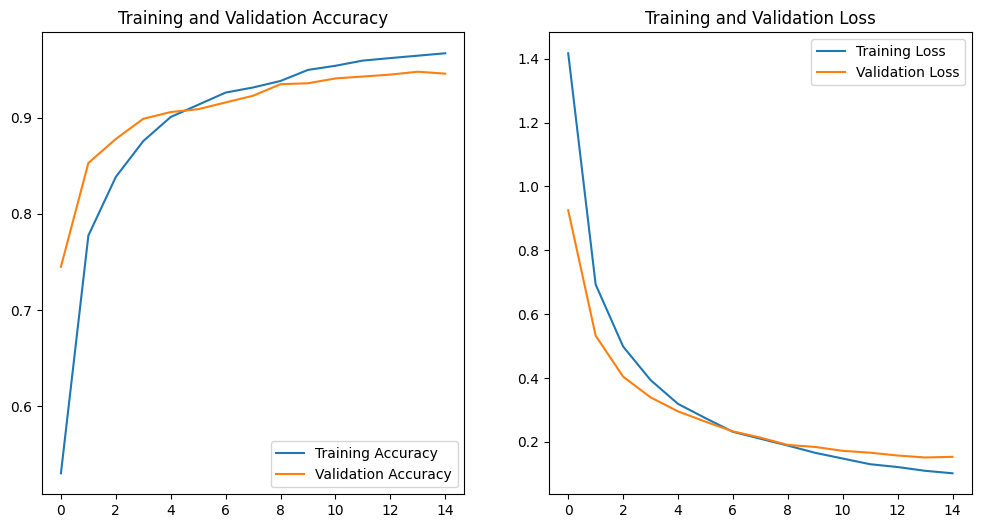

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(15)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Modell mentése

In [ ]:
model.save('tomato_leaf_disease_model.keras')